# Import Statements, Settings, and Initializing DF

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
pd.options.display.max_rows = 50
np.set_printoptions(precision=4, suppress=True)
%matplotlib inline

In [3]:
file = 'student_data.csv'
# Replace Na values with NULL object
df = pd.read_csv(file, na_values = ['NULL'])

# Understanding the Data

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
df.size

13035

In [6]:
# Shape X=Rows, Y=Columns
df.shape

(395, 33)

In [7]:
# Showcase the different data types for each column
print(df.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


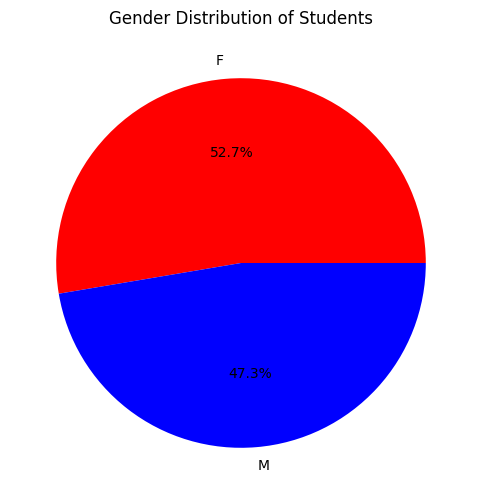

In [8]:
# Gender disctribution in our dataset, females are lightblue, males are light red.
gender_counts = df['sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['red','blue'])
plt.title('Gender Distribution of Students')
plt.show()

Text(0.5, 1.0, 'Address Distribution R=Rural, U=Urban')

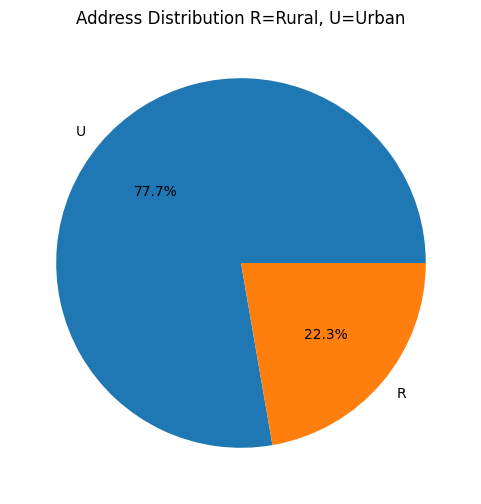

In [9]:
address = df['address'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(address, labels = address.index, autopct='%1.1f%%')
plt.title('Address Distribution R=Rural, U=Urban')

C:\Users\gabgi\AppData\Local\Temp\ipykernel_21964\2558912413.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reason', data=df, palette='bright')


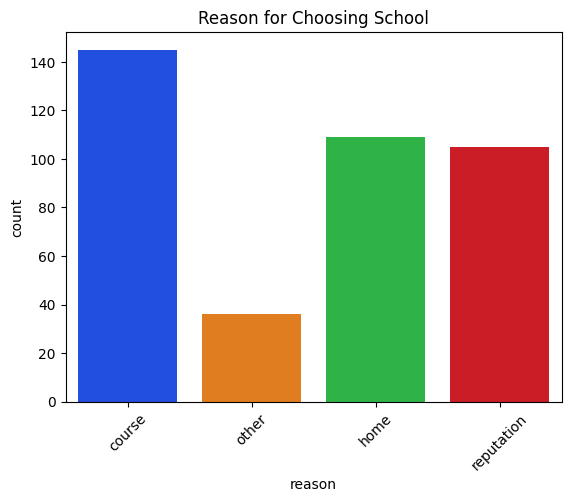

In [10]:
# Reason that a student has been chosen for a specific school
sns.countplot(x='reason', data=df, palette='bright')
plt.title('Reason for Choosing School')
plt.xticks(rotation=45)
plt.show()

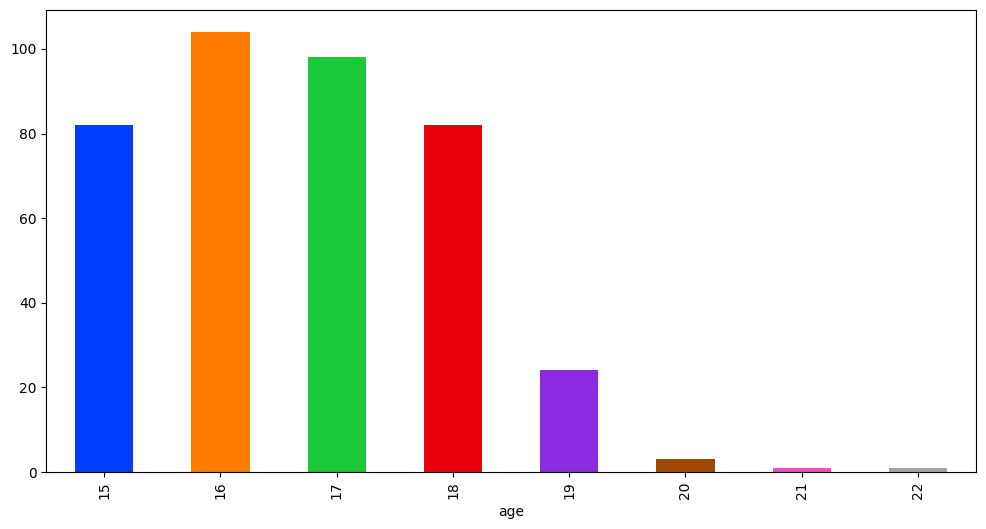

In [11]:
# Age distribution
plt.figure(figsize=(12, 6))
age_counts = df['age'].value_counts().sort_index()
df['age'].value_counts().sort_index().plot(kind='bar', color=sns.color_palette('bright', len(age_counts)))
plt.show()

Text(0.5, 1.0, 'Age Distribution')

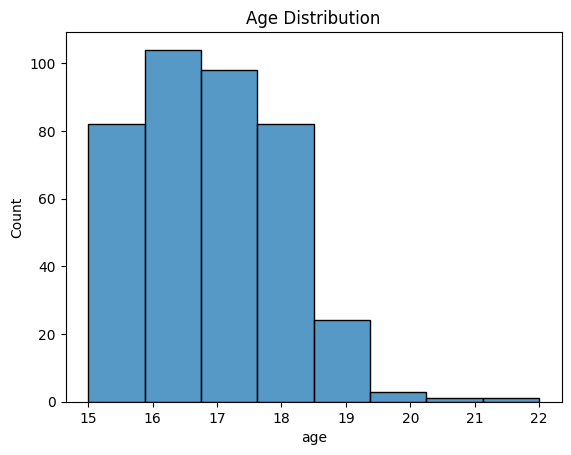

In [12]:
# Another visualization for the age distribution
sns.histplot(df['age'], bins=len(df['age'].unique()), label='Age Distribution')
plt.title('Age Distribution')

C:\Users\gabgi\AppData\Local\Temp\ipykernel_21964\3432315096.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='failures', data=df, palette='bright')


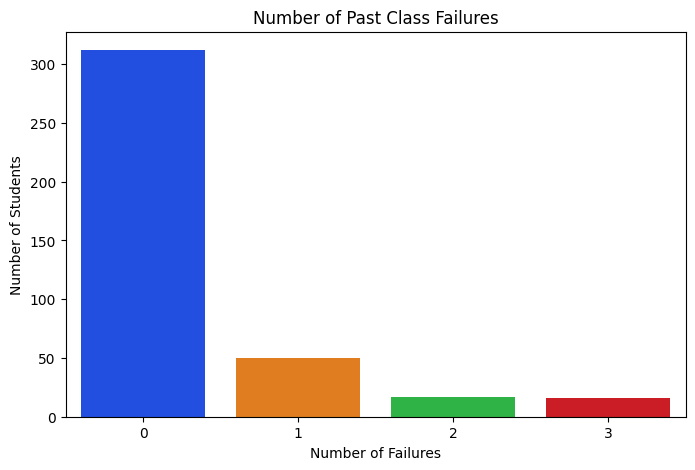

In [13]:
# Distribution of number of failures across all students in the dataset
plt.figure(figsize=(8, 5))
sns.countplot(x='failures', data=df, palette='bright')
plt.title('Number of Past Class Failures')
plt.xlabel('Number of Failures')
plt.ylabel('Number of Students')
plt.show()

C:\Users\gabgi\AppData\Local\Temp\ipykernel_21964\3405543375.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alcohol_counts.index, y=alcohol_counts.values, palette='bright')


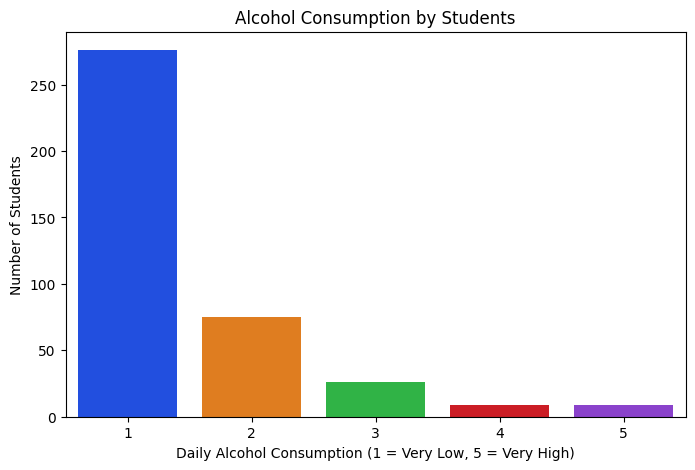

In [14]:
# Alcohol consumption of students distribution
alcohol_counts = df['Dalc'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=alcohol_counts.index, y=alcohol_counts.values, palette='bright')
plt.title('Alcohol Consumption by Students')
plt.xlabel('Daily Alcohol Consumption (1 = Very Low, 5 = Very High)')
plt.ylabel('Number of Students')
plt.show()

<Figure size 1600x400 with 0 Axes>

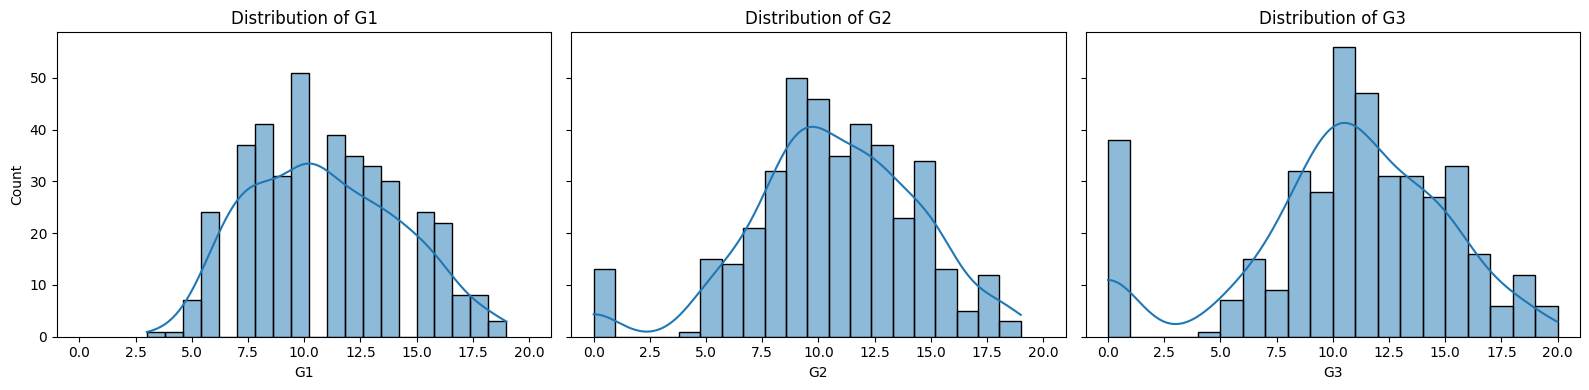

In [15]:
# Grade Distribition for each semester
plt.figure(figsize=(16, 4))
fig, axs = plt.subplots(1, 3, figsize=(16, 4), sharex=True, sharey=True)

for i, grade in enumerate(['G1', 'G2', 'G3']):
    sns.histplot(df[grade], bins=20, kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {grade}')

plt.tight_layout()
plt.show()

In [16]:
# Before continuing, we need a simple way to track the grades of each student, but without accessing multiple
# variables at a time (G1,G2,G3), therefore we take the mean of all the semester grades (G1,G2,G3) and assign
# them to a new variable/columns 'average_G':
df['average_G'] = df[['G1', 'G2', 'G3']].mean(axis=1)

Text(0.5, 1.0, 'Average Grade Distribution')

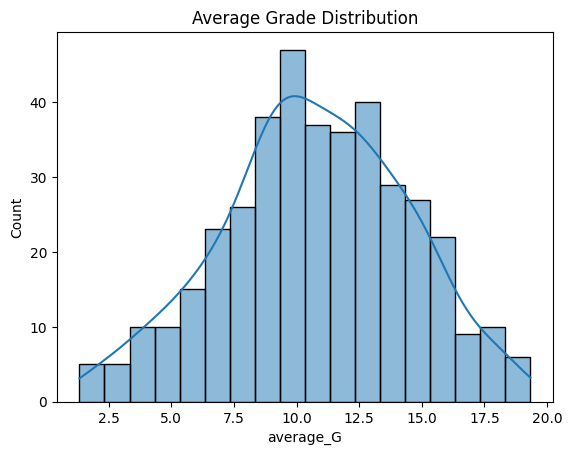

In [17]:
sns.histplot(df['average_G'], kde=True, bins=18)
plt.title("Average Grade Distribution")

C:\Users\gabgi\AppData\Local\Temp\ipykernel_21964\3445641147.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='average_G', palette='bright', data=df)


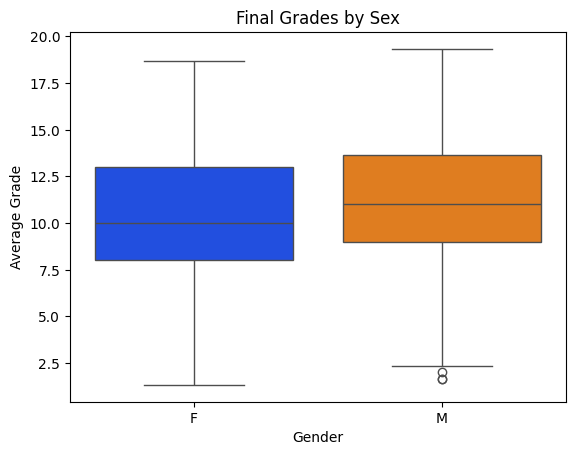

In [18]:
sns.boxplot(x='sex', y='average_G', palette='bright', data=df)
plt.title('Final Grades by Sex')
plt.xlabel('Gender')
plt.ylabel('Average Grade')
plt.show()

C:\Users\gabgi\AppData\Local\Temp\ipykernel_21964\2592097526.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='average_G', data=df, palette='bright')


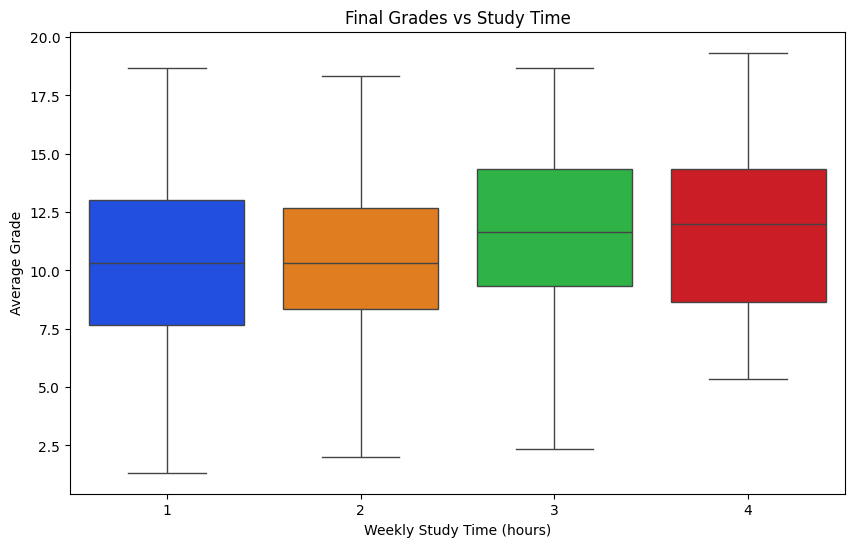

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='average_G', data=df, palette='bright')
plt.title('Final Grades vs Study Time')
plt.xlabel('Weekly Study Time (hours)')
plt.ylabel('Average Grade')
plt.show()

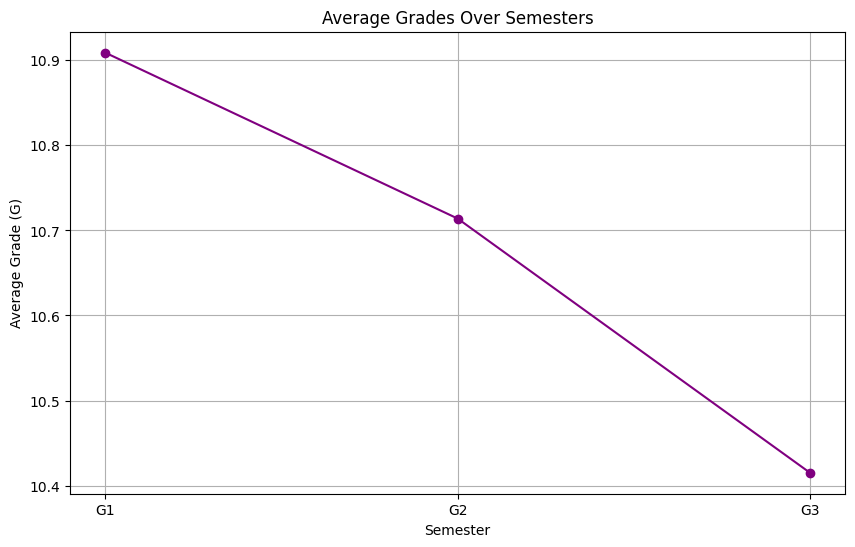

In [20]:
average_grades = df[['G1', 'G2', 'G3']].mean()
semesters = ['G1', 'G2', 'G3']

plt.figure(figsize=(10, 6))
plt.plot(semesters, average_grades, marker='o', linestyle='-', color='purple')
plt.title('Average Grades Over Semesters')
plt.xlabel('Semester')
plt.ylabel('Average Grade (G)')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Box Plots of Average Grade Accross Ages and Sex')

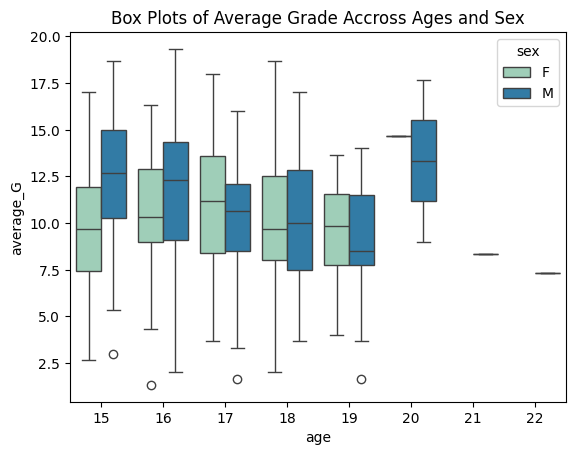

In [21]:
sns.boxplot(x='age', y='average_G', data=df, hue='sex', palette='YlGnBu')
plt.title("Box Plots of Average Grade Accross Ages and Sex")

<Axes: xlabel='reason', ylabel='average_G'>

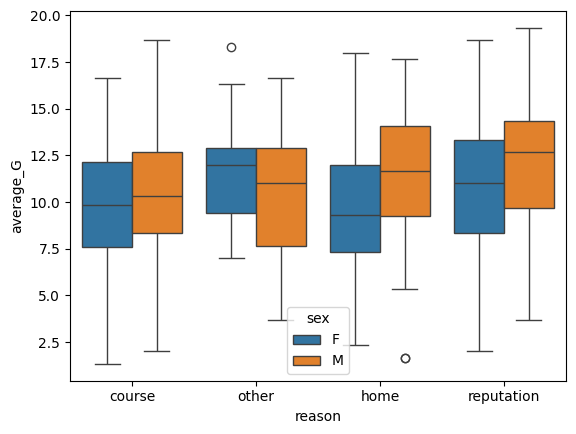

In [22]:
sns.boxplot(x='reason',y='average_G', hue='sex', data=df)

Text(0.5, 1.0, 'Father n Mother Education compared to students Average G')

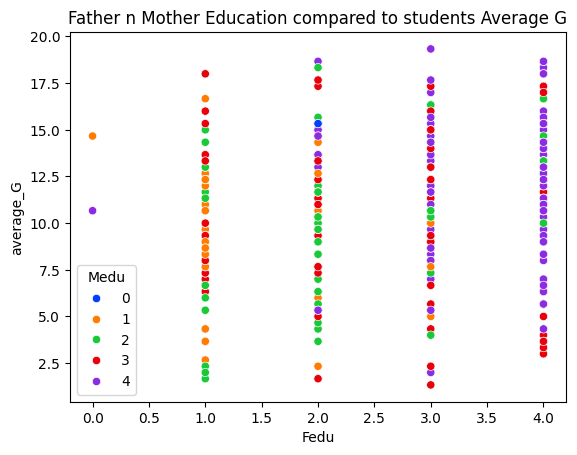

In [23]:
# UNEXPECTED OUTCOME/CONCLUSION, couples tend to be married to the same level of education
# Completely unrelated, but a powerful statement showcasing what unexpected outcomes
# and understanding we can derive from completely unrelated dataset purposes.
df['average_G'] = df[['G1', 'G2', 'G3']].mean(axis=1)
sns.scatterplot(x='Fedu', y='average_G', hue='Medu', data=df, palette="bright")
#sns.stripplot(x='Fedu',y='average_G', hue='sex', size='Medu', data=df)
plt.title('Father n Mother Education compared to students Average G')

# Data Wrangling and Analysis

So far our plots cannot tell us much to answer our research question. Nothing is out of the ordinary or pops out to gives us strong conclusions to what affects a student performance.
Therefore, in this part we will start Data Wrangling to allow the power of data science to do the analysis for us. This will happen by forming a correlation matrix and using a simple linear regression model to understand what really effects the student performance aka average_G.

In [24]:
# We start by initializing a Label Encoder to derive 
# meaningful observations in integers instead of 
# string categories, to be also used in our 
# corelation analysis and heatmap.
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

# Convert the following selected strings columns
columns_for_label = ['school', 'sex', 'address', 'famsize', 
                      'Pstatus', 'Mjob', 'Fjob', 'reason', 
                      'guardian', 'schoolsup', 'famsup', 
                      'paid', 'activities', 'nursery', 
                      'higher', 'internet', 'romantic' ]

for col in columns_for_label:
    df[col] = label_encoder.fit_transform(df[col])



The correlation of each column to 'average_G'
 school       -0.043285
sex           0.101122
age          -0.134589
address       0.107297
famsize       0.082560
Pstatus      -0.043048
Medu          0.224260
Fedu          0.175852
Mjob          0.099646
Fjob          0.057452
reason        0.120118
guardian     -0.071126
traveltime   -0.128197
studytime     0.134565
failures     -0.375759
schoolsup    -0.137644
famsup       -0.061553
paid          0.089511
activities    0.040859
nursery       0.065145
higher        0.189483
internet      0.102628
romantic     -0.102731
famrel        0.021653
freetime      0.003773
goout        -0.154511
Dalc         -0.072508
Walc         -0.088025
health       -0.080380
absences     -0.005909
G1            0.919386
G2            0.967999
G3            0.959873
average_G     1.000000
Name: average_G, dtype: float64


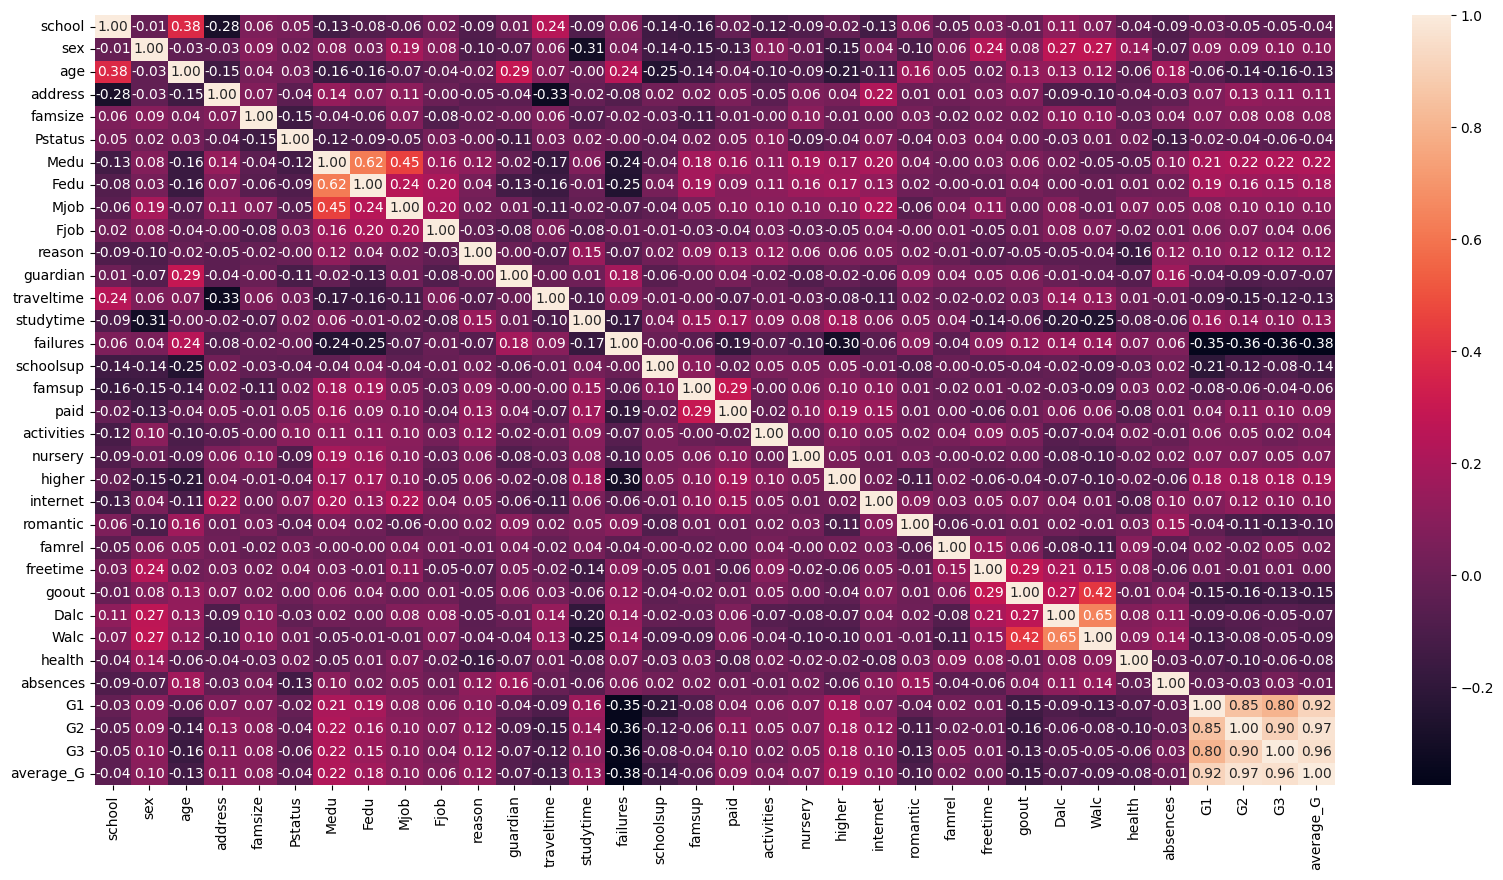

In [25]:
# Creating the correlation matrix and producing a 
# heatmap out of it
correlation = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, fmt = '.2f')

# Correlation of the columns to average_G
correlation1 = df.corr()['average_G']
print('The correlation of each column to \'average_G\'\n', correlation1)

In [26]:
# We start by observing what is most corelated with average_G:
top_correlations = correlation1.sort_values(ascending=False).head(10)[1:]
top_correlations

G2           0.967999
G3           0.959873
G1           0.919386
Medu         0.224260
higher       0.189483
Fedu         0.175852
studytime    0.134565
reason       0.120118
address      0.107297
Name: average_G, dtype: float64

C:\Users\gabgi\AppData\Local\Temp\ipykernel_21964\3737107058.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Medu', y='average_G', data=df, hue='higher', dodge=True, palette={'darkblue', 'darkred'}, linestyles='-', errwidth=1, capsize=0.1, ci='sd')
C:\Users\gabgi\AppData\Local\Temp\ipykernel_21964\3737107058.py:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(x='Medu', y='average_G', data=df, hue='higher', dodge=True, palette={'darkblue', 'darkred'}, linestyles='-', errwidth=1, capsize=0.1, ci='sd')


Text(0.5, 1.0, 'Student Performance against Mother Education and Higher Education')

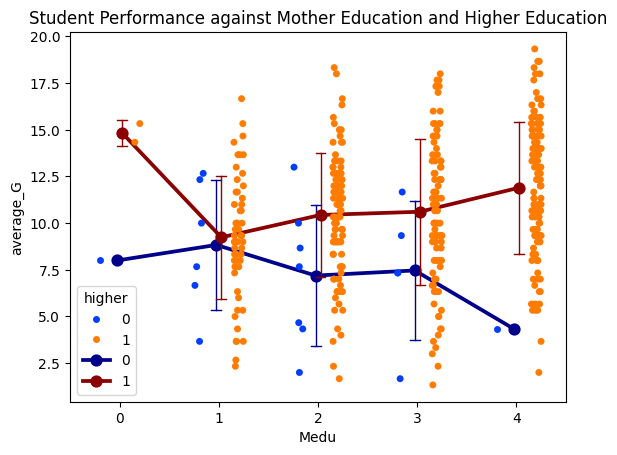

In [27]:
# We start by plotting the top 2 most correlated factors to average_G: Medu, and higher
# Higher here means whether the student would like to pursue a higher level of education aka university.
# 1=True, 0=False
sns.stripplot(x='Medu', y='average_G', data=df, hue='higher', dodge=True, palette='bright')
sns.pointplot(x='Medu', y='average_G', data=df, hue='higher', dodge=True, palette={'darkblue', 'darkred'}, linestyles='-', errwidth=1, capsize=0.1, ci='sd')
plt.title('Student Performance against Mother Education and Higher Education')

C:\Users\gabgi\AppData\Local\Temp\ipykernel_21964\762716010.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Fedu', y='average_G', data=df, hue='higher', dodge=True, palette={'darkblue', 'darkred'}, linestyles='-', errwidth=1, capsize=0.1, ci='sd')
C:\Users\gabgi\AppData\Local\Temp\ipykernel_21964\762716010.py:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(x='Fedu', y='average_G', data=df, hue='higher', dodge=True, palette={'darkblue', 'darkred'}, linestyles='-', errwidth=1, capsize=0.1, ci='sd')


Text(0.5, 1.0, 'Student Performance against Father Education and Higher Education')

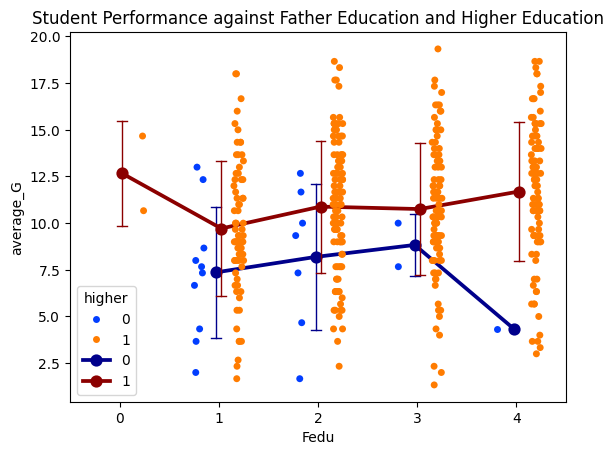

In [28]:
# We do the same for Fedu and higher:
sns.stripplot(x='Fedu', y='average_G', data=df, hue='higher', dodge=True, palette='bright')
sns.pointplot(x='Fedu', y='average_G', data=df, hue='higher', dodge=True, palette={'darkblue', 'darkred'}, linestyles='-', errwidth=1, capsize=0.1, ci='sd')
plt.title('Student Performance against Father Education and Higher Education')

In [29]:
# Least/negatively correlated columns to average_G
# Note that usually negative correlations are disregarded, however, in our analysis negative correlations are also important
# hence we are studying factors that also effect grades negatively, not just positively.
top_negative_correlations = correlation1.sort_values().head(8)
top_negative_correlations

failures     -0.375759
goout        -0.154511
schoolsup    -0.137644
age          -0.134589
traveltime   -0.128197
romantic     -0.102731
Walc         -0.088025
health       -0.080380
Name: average_G, dtype: float64

C:\Users\gabgi\AppData\Local\Temp\ipykernel_21964\32731746.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='failures', y='average_G', data=df, palette='bright')


Text(0, 0.5, 'Average Grade')

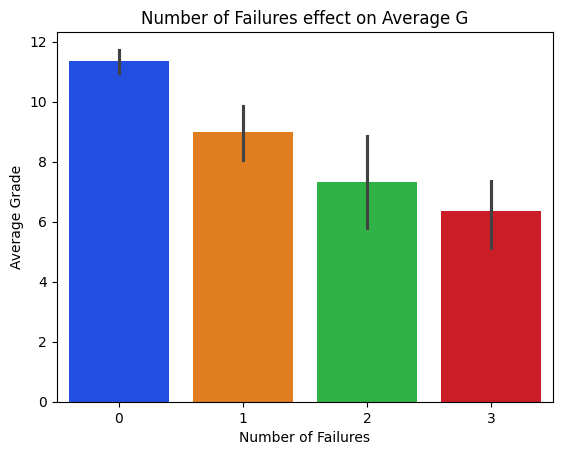

In [30]:
# We start by plotting the most negatively correlated column: failures
sns.barplot(x='failures', y='average_G', data=df, palette='bright')
plt.title('Number of Failures effect on Average G')
plt.xlabel('Number of Failures')
plt.ylabel('Average Grade')

A very powerful statement can be dervied from this plot, the number of failures a student has experienced can have a profound negative impact on there performance in future endeavours.

C:\Users\gabgi\AppData\Local\Temp\ipykernel_21964\28423672.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='goout', y='average_G', data=df, palette='bright')


Text(0, 0.5, 'Average Grade')

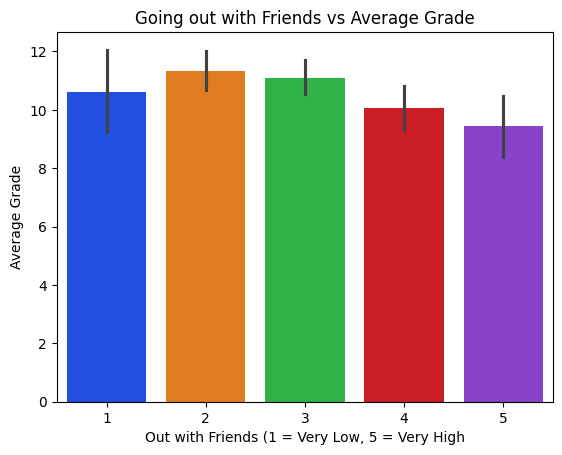

In [31]:
sns.barplot(x='goout', y='average_G', data=df, palette='bright')
plt.title('Going out with Friends vs Average Grade')
plt.xlabel('Out with Friends (1 = Very Low, 5 = Very High')
plt.ylabel('Average Grade')

Going out with friends is a double-edged sword, going out a fair bit of number of times is actually beneficial, but too much will have negative consequences on their grade.

Text(0.5, 1.0, 'School Support Effect on Average Grade 0=No Support')

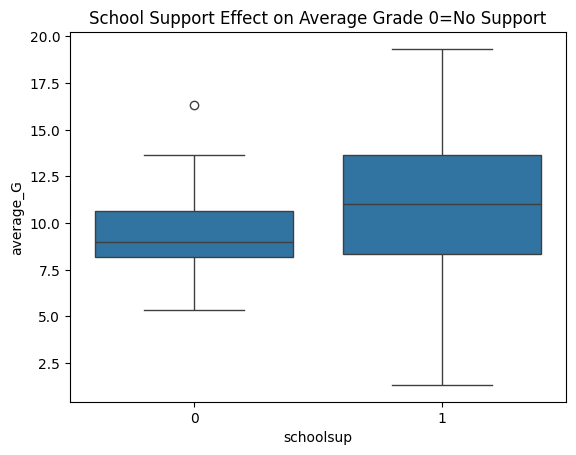

In [32]:
df['schoolsup'] = 1 - df['schoolsup'] # The data is read in incorrectly, we need to invert them, label encoder issue.
sns.boxplot(x='schoolsup', y='average_G', data=df)
plt.title('School Support Effect on Average Grade 0=No Support')

C:\Users\gabgi\AppData\Local\Temp\ipykernel_21964\4238545085.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='age', y='average_G', data=df, ci=None)


Text(0.5, 1.0, 'Age vs Grade Performance')

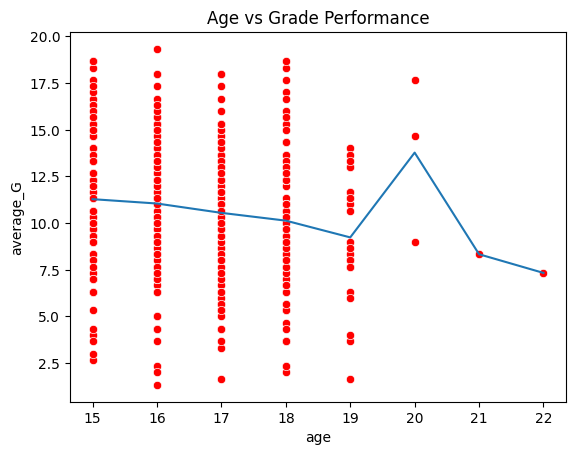

In [33]:
sns.lineplot(x='age', y='average_G', data=df, ci=None)
sns.scatterplot(x='age', y='average_G', data=df, color='red', marker='o')
plt.title('Age vs Grade Performance')

Here we can see that as age increases, the grade performance also decreases, which is in line with what we expected according to the inverse correlation we observed in the correlation matrix. However, we can see that there is a bump in age 20 but, this can be attributed to the lack of data in this dataset at ages 20 and above, there is not enough data to say that either grades are increasing or decreasing at and after age 20, but we can conclude before that from age 15 to 19 are on average decreasing because we have enough evidence to conclude that.

C:\Users\gabgi\AppData\Local\Temp\ipykernel_21964\48731928.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='traveltime', y='average_G', data=df, ci=None)


Text(0.5, 1.0, 'Travel Time vs Grade Performance')

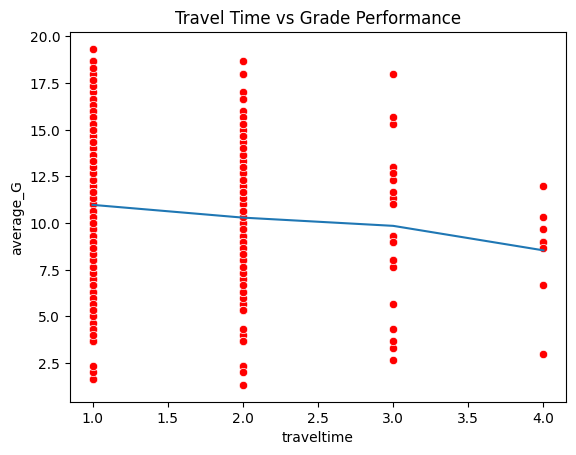

In [34]:
sns.lineplot(x='traveltime', y='average_G', data=df, ci=None)
sns.scatterplot(x='traveltime', y='average_G', data=df, color='red', marker='o')
plt.title('Travel Time vs Grade Performance')

Minor effect on grade performance from traveltime, so we can stop here and conclude our analysis on basis of correlation matrix.

# Further Analysis

So far we have looked at a number of columns/factors that affect the performance of a student, we derived useful conclusions. Howerver our analysis thus far was focused at one, two or three at max columns/factors at a time. Thus, we would like to understand what are the combination of factors beyond 3 variables that affect the performance grade because in reality, there is a multitude of factors that come into play, some that are not directly recognisable. So, we can use the following simple linear regression model to figure out what combination of factors are most capable according to our dataset:

In [35]:
exclude_columns = ['average_G', 'G1', 'G2', 'G3']
column_list = [col for col in df.columns if col not in exclude_columns]
inputColumns = column_list
goodColumns = None
goodModel = None
goodMAE = float('inf')
for columns in combinations(inputColumns, 1): ### <<< Insert here the number of columns you would like to include,
    # Note this increases loading time exponentionally.
    LR = LinearRegression()
    x = df[list(columns)]
    y = df['average_G']
    LR.fit(x,y)
    prediction = LR.predict(x)
    
    mae = mean_absolute_error(y, prediction)
    if mae < goodMAE:
        goodColumns = columns
        goodModel = LR
        goodMAE = mae
print('The best columns to predict average_G with lowest error is: {} with lowest mean absolute error at: {}'.format(goodColumns, goodMAE))

The best columns to predict average_G with lowest error is: ('failures',) with lowest mean absolute error at: 2.763254144768302


# Linear, DecisionTree, and KNN Regression Models

Lets figure out first what is the the most correlated variable to our target Average_G.
This is the same LR algorithm seen before that figures the best columns with lowest mean absolute error to our target.
The only difference is we replace the input by only 1.

In [36]:

inputColumns = column_list
goodColumns = None
goodModel = None
goodMAE = float('inf')
for columns in combinations(inputColumns, 1): ### <<< Insert here the number of columns you would like to include,
    # Note this increases loading time exponentionally.
    LR = LinearRegression()
    x = df[list(columns)]
    y = df['average_G']
    LR.fit(x,y)
    prediction = LR.predict(x)
    
    mae = mean_absolute_error(y, prediction)
    if mae < goodMAE:
        goodColumns = columns
        goodModel = LR
        goodMAE = mae
print('The best columns to predict average_G with lowest error is: {} with lowest mean absolute error at: {}'.format(goodColumns, goodMAE))

The best columns to predict average_G with lowest error is: ('failures',) with lowest mean absolute error at: 2.763254144768302


On the previous block, multiple values were tried for the combination and the overall result was always similar, with a MAE around 2.6 no matter the number of columns.

The following funtion will help to train all different models 100 times each in order to compute the average MSE for each of them as our benchmark score.

In [37]:
# Split data into features and target variable
X = df.drop(['G1', 'G2', 'G3', 'average_G'], axis=1)
y = df['average_G']

def mse_mean_100_tests(model):
    mse = 0
    for i in range(100):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        model.fit(x_train, y_train)
        prediction = model.predict(x_test)
        mse += mean_squared_error(y_test, prediction)
    return mse/100

Linear Regression MSE over 100 tests:  13.869903923126328
Decision Tree MSE over 100 tests: 14.212345313272651
KNN MSE over 100 tests: 16.356705485232066
Polynomial Regression (Degree 2) MSE over 100 tests: 13.755444115632939


C:\Users\gabgi\AppData\Local\Temp\ipykernel_21964\2157898.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_values, palette='bright')


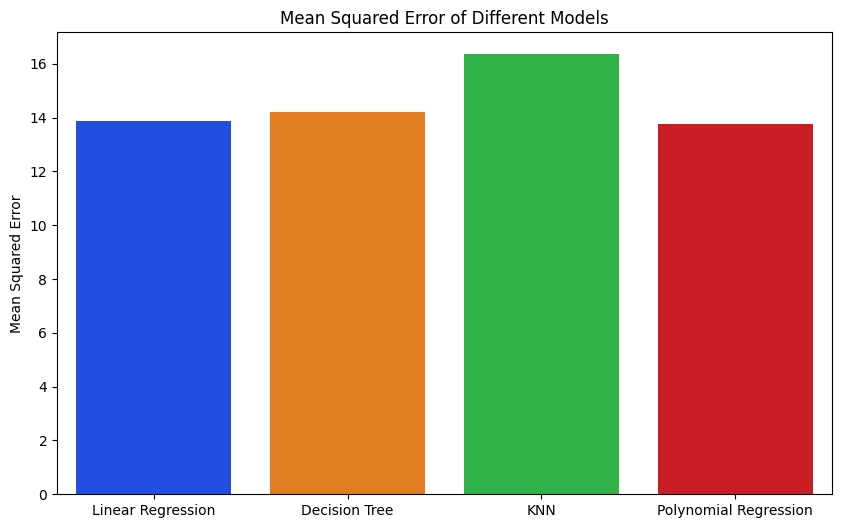

In [38]:

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mse_mean = mse_mean_100_tests(lr_model)
print("Linear Regression MSE over 100 tests: ", lr_mse_mean)

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mse_mean = mse_mean_100_tests(dt_model)
print("Decision Tree MSE over 100 tests:", dt_mse_mean)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_mse_mean = mse_mean_100_tests(knn_model)
print("KNN MSE over 100 tests:", knn_mse_mean)

# Polynomial Regression (using degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
poly_predictions = poly_model.predict(X_test)
poly_mse = mean_squared_error(y_test, poly_predictions)
poly_mse_mean = mse_mean_100_tests(poly_model)
print("Polynomial Regression (Degree 2) MSE over 100 tests:", poly_mse_mean)

# barplot of the mean squared errors
plt.figure(figsize=(10, 6))
models = ['Linear Regression', 'Decision Tree', 'KNN', 'Polynomial Regression']
mse_values = [lr_mse_mean, dt_mse_mean, knn_mse_mean, poly_mse_mean]
sns.barplot(x=models, y=mse_values, palette='bright')
plt.title('Mean Squared Error of Different Models')
plt.ylabel('Mean Squared Error')
plt.show()

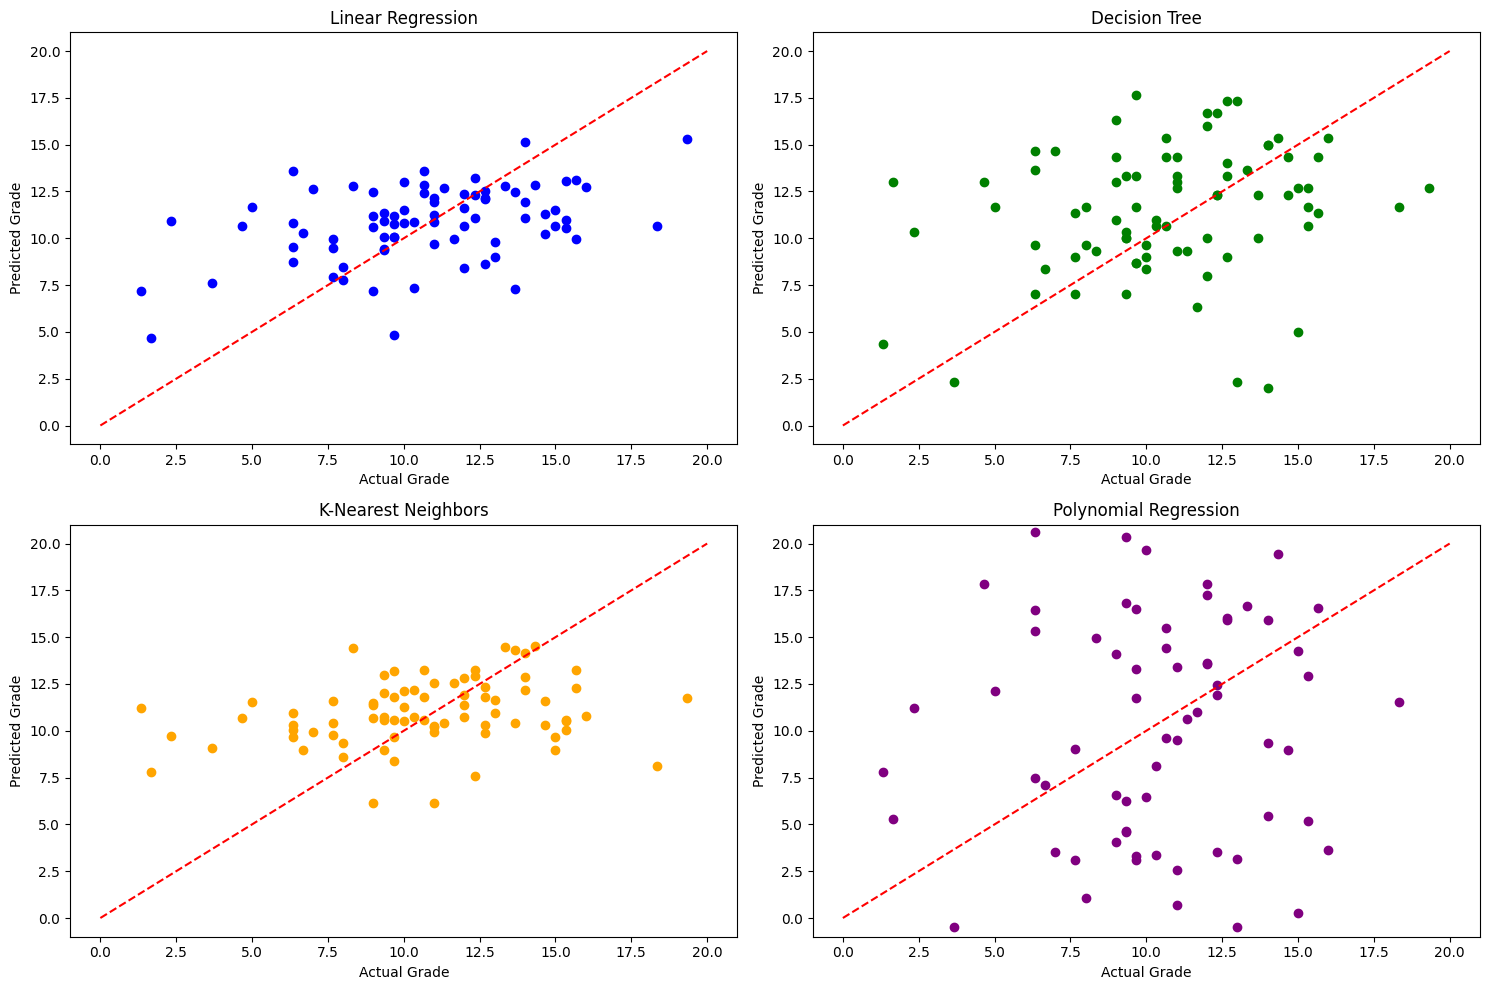

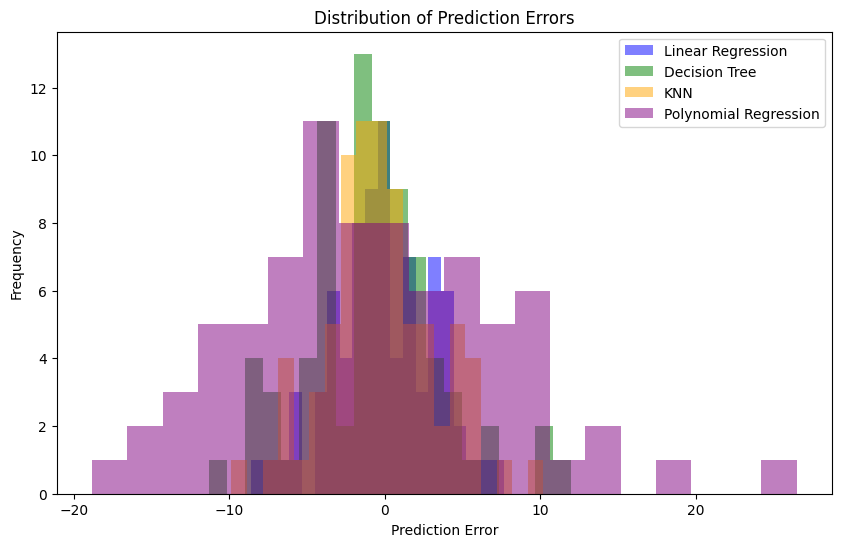

In [387]:
# Scatter plot of predictions vs actual grades for each algorithm
plt.figure(figsize=(15, 10))

# Linear Regression
plt.subplot(2, 2, 1)
plt.scatter(y_test, lr_predictions, color='blue')
plt.plot([0, 20], [0, 20], color='red', linestyle='--')
plt.title('Linear Regression')
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')

# Decision Tree
plt.subplot(2, 2, 2)
plt.scatter(y_test, dt_predictions, color='green')
plt.plot([0, 20], [0, 20], color='red', linestyle='--')
plt.title('Decision Tree')
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')

# K-Nearest Neighbors
plt.subplot(2, 2, 3)
plt.scatter(y_test, knn_predictions, color='orange')
plt.plot([0, 20], [0, 20], color='red', linestyle='--')
plt.title('K-Nearest Neighbors')
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')

# Polynomial Regression
plt.subplot(2, 2, 4)
plt.scatter(y_test, poly_predictions, color='purple')
plt.plot([0, 20], [0, 20], color='red', linestyle='--')
plt.title('Polynomial Regression')
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')
plt.ylim(-1, 21)

plt.tight_layout()
plt.show()

# Distribution of prediction errors
plt.figure(figsize=(10, 6))

# Linear Regression
plt.hist(y_test - lr_predictions, bins=20, color='blue', alpha=0.5, label='Linear Regression')

# Decision Tree
plt.hist(y_test - dt_predictions, bins=20, color='green', alpha=0.5, label='Decision Tree')

# K-Nearest Neighbors
plt.hist(y_test - knn_predictions, bins=20, color='orange', alpha=0.5, label='KNN')

# Polynomial Regression
plt.hist(y_test - poly_predictions, bins=20, color='purple', alpha=0.5, label='Polynomial Regression')

plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()